## Investigating Pregnancy Associated Mortality in NYC

### What my Data is. (3 Points)

Maternal mortality is widely considered an indicator of overall population health and the status of women 
in the population. DOHMH uses multiple methods including death certificates, vital records linkage, 
medical examiner records, and hospital discharge data to identify all pregnancy-associated deaths (deaths 
that occur during pregnancy or within a year of the end of pregnancy) in NYC each year.
DOHMH( new york city department of health and mental hygiene) convenes the Maternal Mortality and Morbidity Review 
Committee (M3RC), a multidisciplinary and diverse group of 40 members that conducts an in-depth, expert review of 
each maternal death in NYC from both a clinical and social determinants of health perspective.

### Where my Data comes from. (3 Points)

<b>NYC OPEN DATA</b>

The data in this table come from vital records, Maternal Mortality and Morbidity Review Committee (M3RC review process).

https://data.cityofnewyork.us/browse?q=Pregnancy-Associated%20Mortality&sortBy=relevance

### Introducing the Question. (3 Points)

What are the most affected areas with respects to each variable under consideration?

Maternal mortality refers to deaths due to complications from pregnancy or childbirth. A number of women and girls
die each day from complications in pregnancy and childbirth. And for every woman who dies, approximately 20 others 
suffer serious injuries, infections or disabilities.. Almost all maternal deaths can be prevented, as evidenced by 
the huge disparities found across states of NYC from the data collected.


### Why it is Important. (3 Points)

Understanding the most affected areas can help us uncover what is being done wrong and what needs to be prevented to 
reduce these numbers, and the further steps that can be taken line with this research.


## Data Processing.

List the Transformations and Modifications that will need to be made to your Data to Facilitate 
your Analysis (2 Points each, 6 Points)

Due to the privacy laws, a lot of ambiguity was been introduced into the original data resulting to multiple rows passing the
same message.

- [Point 1: All nan values where dropped, so as to avoid interference during analysis.]
- [Point 2: DataFrame indexing was used to sieve out rows giving duplicate information.]
- [Point 3: Specific information was then extracted from the transformed dataframe and was used to form a new dataframe which was then melted for our visualisation, comparing the deaths arising as a result of pregnancy to the total death recorded.]

## Analysis.

List the Analyses you will use to answer your question. (MIN 3) 2 Points each.
 
The work carried out on this dataset was mostly EDA (Exploratory Data Analysis), to generate insight and pave way for further
and more specific study.

- [Point 1: Barplot was used to visualize the approximate percentage contribution pregnancy related deaths contributed to the overall death.]
- [Point 2: Barplots were used to visualize the approximate percentage contribution of each distinct category in each column to the total number of death from pregnancy related causes, and compare them to each other for insight on the next direction.]
- [Point 3: Lineplots were used to visualize and compare the trends of each category in each column to see similarities between them and the overall trend, as well as each other.]


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('max_row', None)

In [30]:
#import the data
pam_df = pd.read_csv('Pregnancy-Associated_Mortality.csv') # load the aid data set

In [31]:
# The datatypes of the various columns is confirmed to know whether any datatype change is necesary.
pam_df.dtypes

Year                 int64
Related             object
Underlying_cause    object
Race/ethnicity      object
Borough             object
Deaths               int64
dtype: object

In [32]:
# nan values are dropped from the dataset to ease analysis.
pam_df.dropna(inplace=True)
pam_df

,Year,Related,Underlying_cause,Race/ethnicity,Borough,Deaths
0,2016,Pregnancy-related,Cardiovascular Conditions,All,All,7
1,2016,Pregnancy-related,Hemorrhage,All,All,4
2,2016,Pregnancy-related,Pregnancy-induced hypertension,All,All,2
3,2016,Pregnancy-related,Other,All,All,2
4,2016,Pregnancy-associated but not related,Overdose/substance Use Disorder,All,All,6
5,2016,Pregnancy-associated but not related,Cancer,All,All,5
6,2016,Pregnancy-associated but not related,Cardiovascular Conditions,All,All,2
7,2016,Pregnancy-associated but not related,Infection/Sepsis,All,All,2
8,2016,Pregnancy-associated but not related,Other,All,All,2
9,2016,Unable to Determine,Homicide,All,All,3


### Question 1

- [What overall percentage does pregnancy related deaths constitute in the overall death.]

In [33]:
#A dictionary with empty values is created, so we can extract and feed data into it to create our desired dataframe.
pam_ratio = {'Year':[], 'Total Deaths':[], 'Pregnancy-related Deaths':[]}

# The original dataset is looped through to extract specific information.
for year in [2016, 2017, 2018]:
    pam_temporary = pam_df[pam_df['Year']==year] # the dataframe is indexed with the current year-count in the loop
    
    #Since we want to focus on the Related and the Underlying_cause Columns for now, we remove rows with ambiguous data on those
    #respective columns (i.e the rows containing 'All')
    pam_temporary = pam_temporary[(pam_temporary['Related']!='All')&(pam_temporary['Underlying_cause']!='All')]
    
    #The remaining data is grouped, and the sum of the deaths of each category in the 'Related' column is computed.
    pam_temporary = pd.DataFrame(pam_temporary.groupby('Related')['Deaths'].sum())
    pam_temporary.reset_index(level=0, inplace=True)
    
    #The various needed values are extracted and added to our earlier created dictionary
    pam_ratio['Year'].append(year)
    pam_ratio['Total Deaths'].append(pam_temporary['Deaths'].sum())
    pam_temporary = pam_temporary[pam_temporary['Related']=='Pregnancy-related']
    pam_ratio['Pregnancy-related Deaths'].append(pam_temporary['Deaths'].values[0])

#Our filled dictionary is now used to create a new data frame for visualisation    
pam_ratio = pd.DataFrame(pam_ratio)
pam_ratio

,Year,Total Deaths,Pregnancy-related Deaths
0,2016,36,15
1,2017,55,19
2,2018,36,19


<AxesSubplot:xlabel='Year', ylabel='Value'>

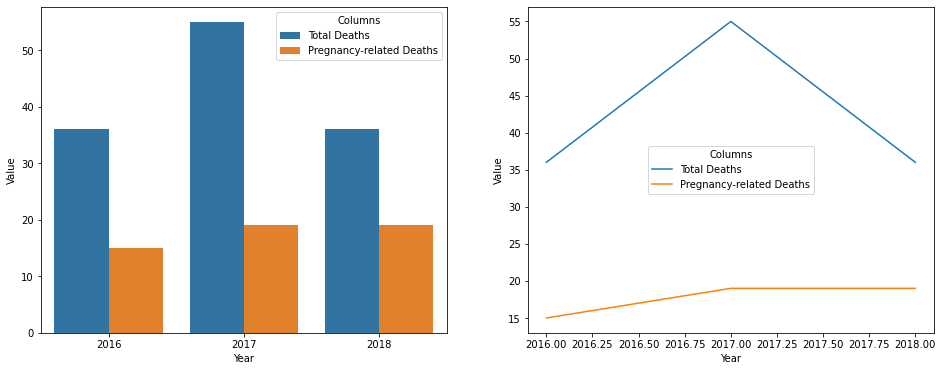

In [34]:
#Seaborn is used to plot the transformed dataframe (using .melt() function) to generate the required insight.
pam_ratio_plot = pam_ratio.melt('Year', var_name='Columns',  value_name='Value')

#The subplot object is defined so we can plot the charts side by side to conserve space, and for quick comparison.
fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.barplot(x="Year", y="Value", hue='Columns', data=pam_ratio_plot, ax=axs[0])
sns.lineplot(x="Year", y="Value", hue='Columns', data=pam_ratio_plot, ax=axs[1])

### Question 2

- [When focused on pregnancy related deaths, what are the most affected ethnicities and boroughs, 
and the most common cause and their trends over the years]

In [35]:
#The original dataframe is indexed so we can focus solely on the pregnancy related deaths
pam_preg_rel = pam_df[pam_df['Related']=='Pregnancy-related']
pam_preg_rel = pam_preg_rel[pam_preg_rel['Year'].isin([2016, 2017, 2018])]
pam_preg_rel

,Year,Related,Underlying_cause,Race/ethnicity,Borough,Deaths
0,2016,Pregnancy-related,Cardiovascular Conditions,All,All,7
1,2016,Pregnancy-related,Hemorrhage,All,All,4
2,2016,Pregnancy-related,Pregnancy-induced hypertension,All,All,2
3,2016,Pregnancy-related,Other,All,All,2
15,2016,Pregnancy-related,All,White non-Latina,All,1
16,2016,Pregnancy-related,All,Latina,All,6
17,2016,Pregnancy-related,All,Black non-Latina,All,6
18,2016,Pregnancy-related,All,Asian/Pacific Islander,All,2
25,2016,Pregnancy-related,All,All,Manhattan,4
26,2016,Pregnancy-related,All,All,Bronx,1


In [36]:
def ratio_table (dataframe, column): 
    """
    This function takes in a dataframe and a column as input, indexes the dataframe using each unique category in the
    specified column and extracts the death count for the unique categories in the specified column for the different years, 
    and outputs a new dataframe comprising of the extracted death counts.
    
    """
    #A dictionary with empty values is created, so we can extract and feed data into it to create our desired dataframe.
    extra_columns = dataframe[dataframe[column]!='All'][column].unique()
    pam_preg_ratio = {'Year':[], 'Total Deaths':[]}
    
    #The specified column is looped through, and each unique cateogry is then added to the empty dictionary as a new key with
    #an empty value.
    for col in extra_columns:
        pam_preg_ratio[col] = []
    
    # The original dataset is looped through to extract specific information.
    for year in [2016, 2017, 2018]:
        pam_temporary = dataframe[dataframe['Year']==year]
        
        #Since we want to focus on the specified Column for now, we remove rows with ambiguous data on
        #those respective columns (i.e the rows containing 'All')
        pam_temporary = pam_temporary[pam_temporary[column]!='All']
        
        #The various needed values are extracted and added to our earlier created dictionary
        pam_preg_ratio['Year'].append(year)
        pam_preg_ratio['Total Deaths'].append(pam_temporary['Deaths'].sum())
        for col in extra_columns:
            pam_temporary_1 = pam_temporary[pam_temporary[column]==col]
            if len(pam_temporary_1['Deaths'].values) == 0:
                pam_preg_ratio[col].append(0)
            else:
                pam_preg_ratio[col].append(pam_temporary_1['Deaths'].values[0])

    return(pd.DataFrame(pam_preg_ratio))

def plot (dataframe):
    """
    The function takes in a dataframe, transforms the dataframe using the .melt() function, and plots the data within
    in order to generate the desired insight.
    
    """
    #Seaborn is used to plot the transformed dataframe (using .melt() function) to generate the required insight.
    pam_preg_ratio_plot = dataframe.melt('Year', var_name='Columns',  value_name='Value')
    
    #The subplot object is defined so we can plot the charts side by side to conserve space, and for quick comparison.
    fig, axs = plt.subplots(ncols=2, figsize=(18,6))
    sns.barplot(x="Year", y="Value", hue='Columns', data=pam_preg_ratio_plot, ax=axs[0])
    sns.lineplot(x="Year", y="Value", hue='Columns', data=pam_preg_ratio_plot, ax=axs[1])

In [37]:
#First we extract pregnancy related death counts based on ethnicity
pam_preg_ratio = ratio_table(pam_preg_rel, 'Race/ethnicity')
pam_preg_ratio

,Year,Total Deaths,White non-Latina,Latina,Black non-Latina,Asian/Pacific Islander,Other/Biracial
0,2016,15,1,6,6,2,0
1,2017,19,1,6,10,1,1
2,2018,23,5,2,13,3,0


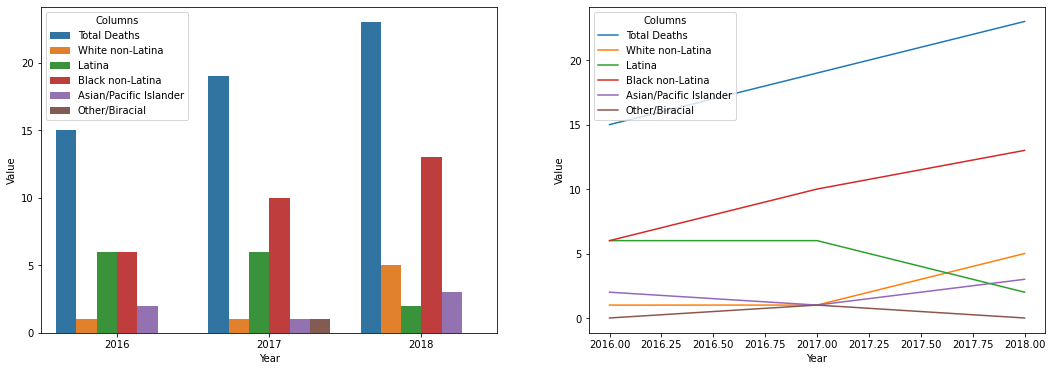

In [38]:
#The new dataframe gotten from extracting data on ethnicity is then plotted
plot(pam_preg_ratio)

In [39]:
#Second we extract pregnancy related death counts based on boroughs (regions of settlements)
pam_preg_ratio = ratio_table(pam_preg_rel, 'Borough')
pam_preg_ratio

,Year,Total Deaths,Manhattan,Bronx,Brooklyn,Queens,Staten Island,NY State Outside NYC
0,2016,15,4,1,5,3,2,0
1,2017,19,4,6,7,0,1,1
2,2018,23,1,5,10,4,0,3


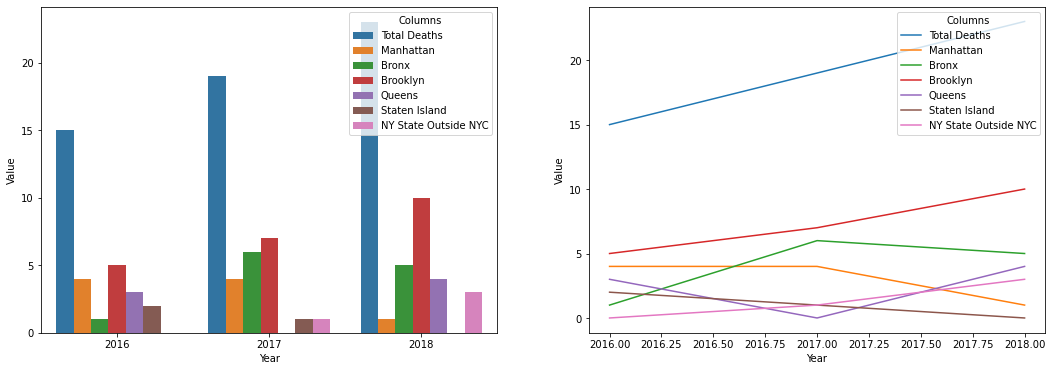

In [40]:
#The new dataframe gotten from extracting data on boroughs is then plotted
plot(pam_preg_ratio)

In [41]:
#Lastly we extract pregnancy related death counts based on Underlying Health Causes
pam_preg_ratio = ratio_table(pam_preg_rel, 'Underlying_cause') 
pam_preg_ratio

,Year,Total Deaths,Cardiovascular Conditions,Hemorrhage,Pregnancy-induced hypertension,Other,Embolism,Mental health conditions,Infection/Sepsis,Unknown COD
0,2016,15,7,4,2,2,0,0,0,0
1,2017,19,3,2,0,3,5,4,2,0
2,2018,19,3,4,0,3,3,4,0,2


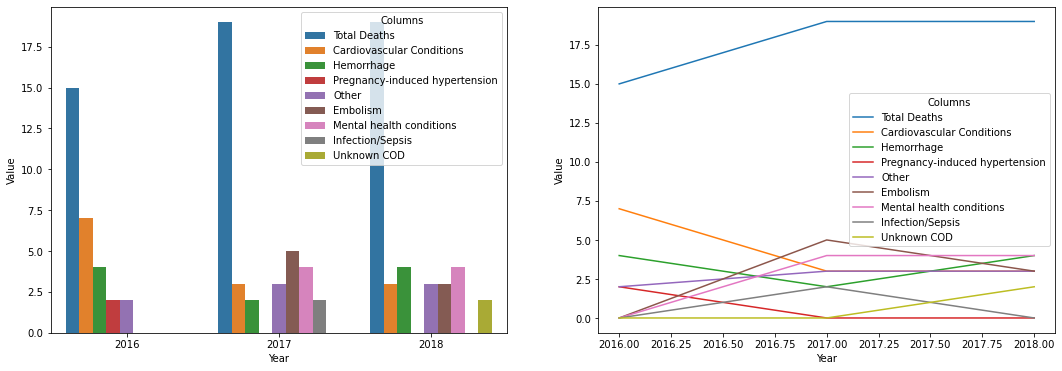

In [42]:
#The new dataframe gotten from extracting data on Underlying Health Causes is then plotted
plot(pam_preg_ratio)

### Further Research
There are multiple further paths that can be followed for such a reasearch, the aim of this analysis is to narrow down those paths to the most logical and efficient with respect to the current data available. Hence, only a few will be discussed in light of our results.

- From the plot on death counts based on Ethnicity, it can be seen that Black non-Latinas have maintained a very similar trend to the overall trend of pregnancy related deaths over the three years, and is on a steady and troubling increase. At the same time it can also be seen that White non-Latinas have also had a steady and less steep increase over the years, while Latinas on the other hand have had a gradual drop in death counts. Therefore, it would be in our best interest to dig deep in to the characteristics, behavioural patterns, and levels of awareness of these ethnic group to find patterns of disparity or similarity, so as to be able to start proferring solutions to drop the deaths per annum.In a similar manner, other categories like Boroughs and Underlying Health Causes can be evaluated and next steps can be outlined based on insight found.


- Another effective but not so obvious next step could be to overlap results from different categories. For instance, looking at the high similarity between death trend of the Black non-Latinas and that of Brooklyn Borough, one could also consider checking specifically the behavioural pattern of the said ethnicity in the said borough to generate highly specific insight. One up side to this is that if the similarity in the trend was not coincidental, then a highly efficient solution could be easily and quickly generated, but if the similarity was merely coincidental, then it would have been a waste of resources.


- One could also check the population distribution (based on ethnicity) of each of these borough, as well the distribution of the total population of the entire geographical region covered by the data under scrutiny, to check and see if the difference in death between the various ethnic group was merely as a result of difference in population mass of the different ethnic groups compared to each other or if there is something else at play.Now, say we had 200 Latinas and 50 Black non-Latinas, it would only seem natural to have more death counts in Latinas due to the sheer size of their population when compared to Black non-Latinas, but it would seem very odd to then higher death counts in Black non-Latinas when Latinas out-number Black non-Latinas by a ratio of 4:1.

### Conlcusion

From the analysis carried out, it can be seen that there are categories with reducing death counts over the years, and others with increasing death counts over the years, which creates an avenue to compare and contrast the features and patterns of each categories in an effort to derive a solution from the existing system itself.